In [1]:
import pandas as pd

from GA.BayesianOptimization import BayesianOptimization
from function_modules.function_module import *

In [2]:
kwargs = {
    'cnn_model_path': '../../Models/CNN_6_1_2.keras',
    'masked_sequence': 'AATACTAGAGGTCTTCCGACNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGTGTGGGCGGGAAGACAACTAGGGG',
    'seed': 0,
    'target_expression': 1,
}

Instructions for updating:
Use tf.identity with explicit device placement instead.


c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
c:\Users\rsore\Documents\GitHub\promoter-sequence-transcription-rates\v2\Testing GA\GA_deap\GA\CNN.py:61: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:281.)
  tensor_sequences = torch.tensor(


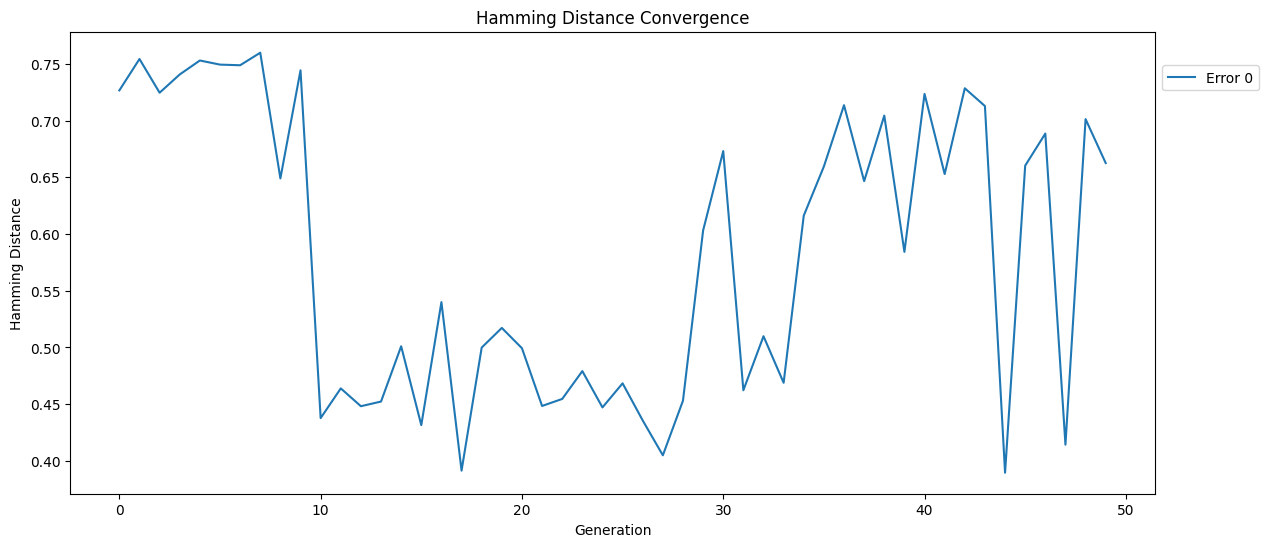

In [3]:
bo = BayesianOptimization(
    **kwargs
)
bo.run()
df = pd.DataFrame(bo.error_history).T
convergence_plot(df, figsize=(14, 6), label='Error')